In [1]:
import pandas as pd
import numpy as np
from plotnine import *
import altair as alt
from vega_datasets import data
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('Lazard.xlsx')
df

,Period,Nuclear,Geothermal,Coal,Wind,Solar Thermal,Solar PV,Gas-Combined
0,2009,123,76,111,135,168,359,83
1,2010,96,107,111,124,157,248,82
2,2011,95,104,111,71,159,157,83
3,2012,96,116,102,72,174,125,75
4,2013,104,116,105,70,145,98,74
5,2014,112,116,109,59,124,79,74
6,2015,117,100,108,55,150,65,64
7,2016,117,98,102,47,151,55,63
8,2017,148,97,102,45,140,50,60
9,2018,151,91,102,42,140,43,58


In [3]:
df.dtypes

Period           int64
Nuclear          int64
Geothermal       int64
Coal             int64
Wind             int64
Solar Thermal    int64
Solar PV         int64
Gas-Combined     int64
dtype: object

In [4]:
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(" ", "_", regex=False)
df

,period,nuclear,geothermal,coal,wind,solar_thermal,solar_pv,gas-combined
0,2009,123,76,111,135,168,359,83
1,2010,96,107,111,124,157,248,82
2,2011,95,104,111,71,159,157,83
3,2012,96,116,102,72,174,125,75
4,2013,104,116,105,70,145,98,74
5,2014,112,116,109,59,124,79,74
6,2015,117,100,108,55,150,65,64
7,2016,117,98,102,47,151,55,63
8,2017,148,97,102,45,140,50,60
9,2018,151,91,102,42,140,43,58


In [5]:
df_long = pd.melt(df, id_vars=['period'])
df_long

,period,variable,value
0,2009,nuclear,123
1,2010,nuclear,96
2,2011,nuclear,95
3,2012,nuclear,96
4,2013,nuclear,104
...,...,...,...
86,2017,gas-combined,60
87,2018,gas-combined,58
88,2019,gas-combined,56
89,2020,gas-combined,59


In [6]:
# df_long.to_csv('long.csv')

In [7]:
two_year = df.drop([0,2,3,4,5,6,7,8,9,10,11])
two_year

,period,nuclear,geothermal,coal,wind,solar_thermal,solar_pv,gas-combined
1,2010,96,107,111,124,157,248,82
12,2021,167,75,108,38,141,36,60


In [8]:
# two_year.to_csv('two_year.csv')

In [9]:
long = pd.melt(two_year, id_vars=['period'])
long

,period,variable,value
0,2010,nuclear,96
1,2021,nuclear,167
2,2010,geothermal,107
3,2021,geothermal,75
4,2010,coal,111
5,2021,coal,108
6,2010,wind,124
7,2021,wind,38
8,2010,solar_thermal,157
9,2021,solar_thermal,141


In [10]:
long_coal = long[long.variable=='coal']

In [11]:
long_coal = long_coal.drop('variable', axis=1)

In [12]:
long_2 = long.drop([10,11])

In [13]:
long = long.drop([8,9,4,5])
long

,period,variable,value
0,2010,nuclear,96
1,2021,nuclear,167
2,2010,geothermal,107
3,2021,geothermal,75
6,2010,wind,124
7,2021,wind,38
10,2010,solar_pv,248
11,2021,solar_pv,36
12,2010,gas-combined,82
13,2021,gas-combined,60


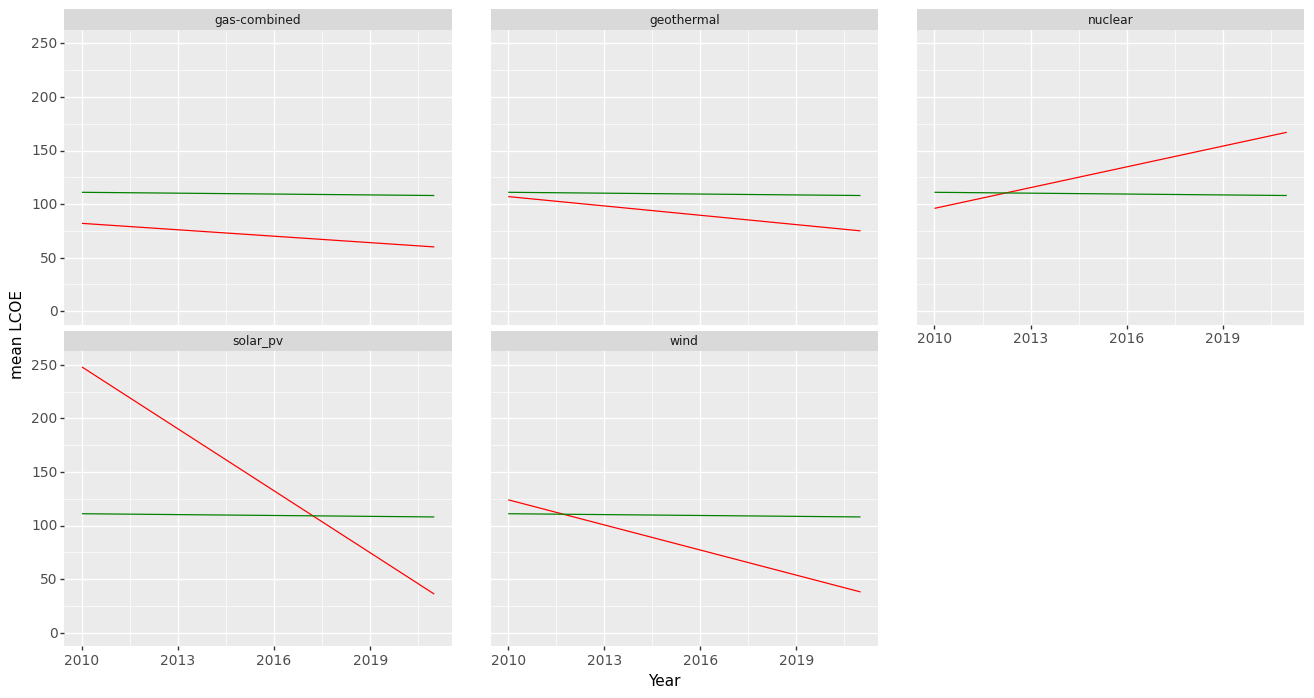

<ggplot: (672804591)>

In [14]:
# NOW YOU CAN PLOT

lazard = (
    ggplot(long, aes('period', 'value')) +
           geom_line(color='red') + # SAME WITH THIS
           geom_line(long_coal, color='green') + # THIS INHERITS aes, but gets a different dataset
           theme(figure_size=(6, 10)) +
           facet_wrap('~ variable') +
           theme(subplots_adjust={'wspace': 0.1},figure_size=(16, 8), 
                 axis_text_x=element_text(ha='center', size=10), 
                 axis_text_y=element_text(size=10))+
           xlim(2010,2021) + ylim(0,250) +
           labs(x= "Year", 
                y="mean LCOE")
)
lazard

In [15]:
fig = lazard.draw()
fig.set_size_inches(3.5, 6.5)

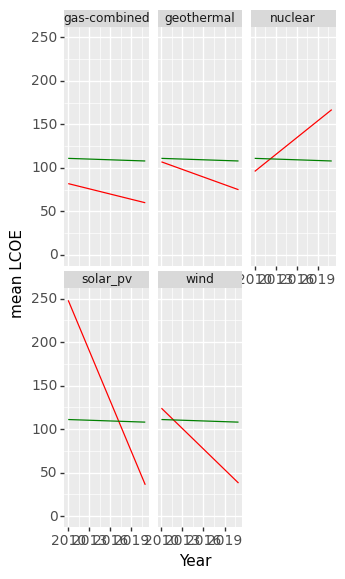

In [16]:
fig

In [17]:
# plt.savefig('fig_smaller.svg')